# BANK MARKETING: TERM DEPOSIT


**Maria Alejandra Torres Valencia**  
maatorresva@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

**Origen de los datos utilizados**
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

DEFINICIÓN DEL PROBLEMA REAL
--

El propósito desde el punto de vista del negocio es poder predecir si un cliente va a adquirir o suscribirse a un depósito a término (CDT), a partir de la información obtenida del proceso de marketing directo realizado por el banco.

DEFINICIÓN DEL PROBLEMA EN TÉRMINOS DE LOS DATOS
--
Los datos utilizados para la realización de este trabajo están relacionados con las campañas de marketing realizadas por un banco portugués (llamadas telefónicas).
Se tiene una muestra de 41188 observaciones donde cada una tiene 20 variables (input variables) y una variable de respuesta (target):
1. age: edad de la persona contactada
2. job: tipo de empleo de la persona contactada
3. marital: estado civil de la persona contactada
4. education: Nivel de educación alcanzado
5. default: Responde a la pregunta ¿tiene crédito en deuda?
6. housing: Responde a la pregunta ¿tiene préstamo de vivienda?
7. loan: Responde a la pregunta ¿tiene préstamo personal?
8. contact: Tipo de medio de contacto
9. month: mes del último contacto
10. day_of_week: día de la semana del último contacto
11. duration: duración del último contacto en segundos
12. campaign: número de contactos realizados durante esta campaña y para este cliente
13. pdays: número de días que pasaron desde que el cliente fue contactado por última vez en una campaña anterior
14. previous: número de contactos realizados a este cliente antes de esta campaña
15. poutcome: resultado de la campaña de marketing anterior
16. emp.var.rate: tasa de variación del empleo (trimestral)
17. cons.price.idx: indice de precios al consumidor (mensual)
18. cons.conf.idx: indice de confianza del consumidor (mensual)
19. euribor3m: tasa euribor (tipo europeo de oferta interbancaria - tipo de interés promedio) diario
20. nr.employed: número de empleados (mensual)

Variable respuesta:
21. y: responde a la pregunta ¿se ha suscrito el cliente a un depósito a término?

En términos de los datos se desea predecir si el cliente se suscribirá a un depósito a término (si o no) con base en las 20 variables dadas.

METODOLOGÍAS A UTILIZAR 
--
Para el análisis predictivo de este problema se utilizarán las siguientes metodologías:

__1.C50__

__2. Naive Bayes__

__3.OneR__

__5.Random Forest__

ANÁLISIS INICIAL DE LOS DATOS
--

In [1]:
## se importan las librerias necesarias
library(data.table)
library(dplyr)
library(lubridate)
library(plotly)
library(ggplot2)
library(gridExtra)
library(ggcorrplot)
library(C50)
library(gmodels)
library(lattice)
library(caret)
library(e1071)
library(OneR)
library(class)
library(randomForest)
library(irr)
library(mlbench)
library(Metrics)


Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'lubridate'

The following objects are masked from 'package:data.table':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following object is masked from 'package:base':

    date

Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.4"
Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout

Warning message:
"package 'gridExtra' was built under R version 3.4.4"
Attaching package: 'gridExtra'

The following object is masked f

In [2]:
## SE LEEN LOS DATOS
bank <- read.csv('bank-additional-full.csv', header = TRUE, sep=";")
## se verifican los datos cargados
str(bank)


'data.frame':	41188 obs. of  21 variables:
 $ age           : int  56 57 37 40 56 45 59 41 24 25 ...
 $ job           : Factor w/ 12 levels "admin.","blue-collar",..: 4 8 8 1 8 8 1 2 10 8 ...
 $ marital       : Factor w/ 4 levels "divorced","married",..: 2 2 2 2 2 2 2 2 3 3 ...
 $ education     : Factor w/ 8 levels "basic.4y","basic.6y",..: 1 4 4 2 4 3 6 8 6 4 ...
 $ default       : Factor w/ 3 levels "no","unknown",..: 1 2 1 1 1 2 1 2 1 1 ...
 $ housing       : Factor w/ 3 levels "no","unknown",..: 1 1 3 1 1 1 1 1 3 3 ...
 $ loan          : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 3 1 1 1 1 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 2 2 2 2 2 2 2 2 2 2 ...
 $ month         : Factor w/ 10 levels "apr","aug","dec",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ day_of_week   : Factor w/ 5 levels "fri","mon","thu",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ duration      : int  261 149 226 151 307 198 139 217 380 50 ...
 $ campaign      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays         : i

In [3]:
head(bank)

age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [4]:
## se verifica si hay datos nulos
#any(is.na(bank))
sapply(bank, function(x) sum(is.na(x)))

age            job        marital      education        default 
             0              0              0              0              0 
       housing           loan        contact          month    day_of_week 
             0              0              0              0              0 
      duration       campaign          pdays       previous       poutcome 
             0              0              0              0              0 
  emp.var.rate cons.price.idx  cons.conf.idx      euribor3m    nr.employed 
             0              0              0              0              0 
             y 
             0

In [5]:
### se extrae la última columna que contiene la variable de respuesta
y = bank$y

## se elimina la última columna (variable respuesta)

x = bank[,1:20]
head(x)


age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191


In [6]:
## cantidad de casos para respuesta
table(y)

y
   no   yes 
36548  4640 

In [7]:
## se obtiene la proporción de depósitos a término
## contratados y NO contratados
prop.table(table(y))

y
       no       yes 
0.8873458 0.1126542 

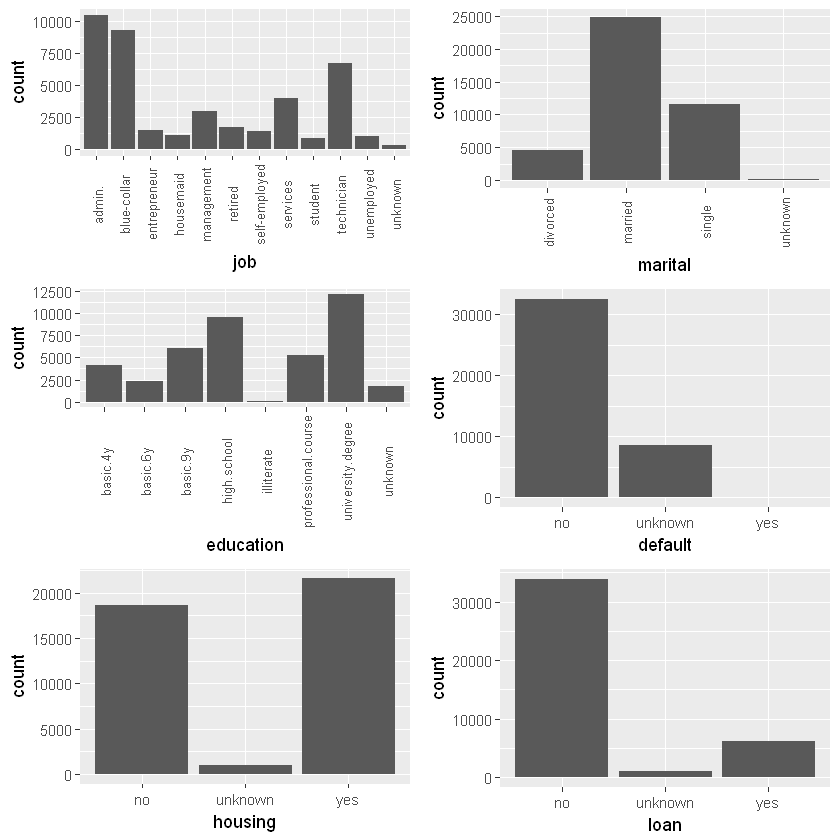

In [8]:
### graficamos las variables categoricas para ver su comportamiento
p1 <- ggplot(x, aes(x = job)) + geom_bar() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, size = 8))
p2 <- ggplot(x, aes(x = marital)) + geom_bar() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, size = 8))
p3 <- ggplot(x, aes(x = education)) + geom_bar() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, size = 8))
p4 <- ggplot(x, aes(x = default)) + geom_bar()
p5 <- ggplot(x, aes(x = housing)) + geom_bar()
p6 <- ggplot(x, aes(x = loan)) + geom_bar()


grid.arrange(p1, p2, p3, p4, p5, p6, ncol=2)

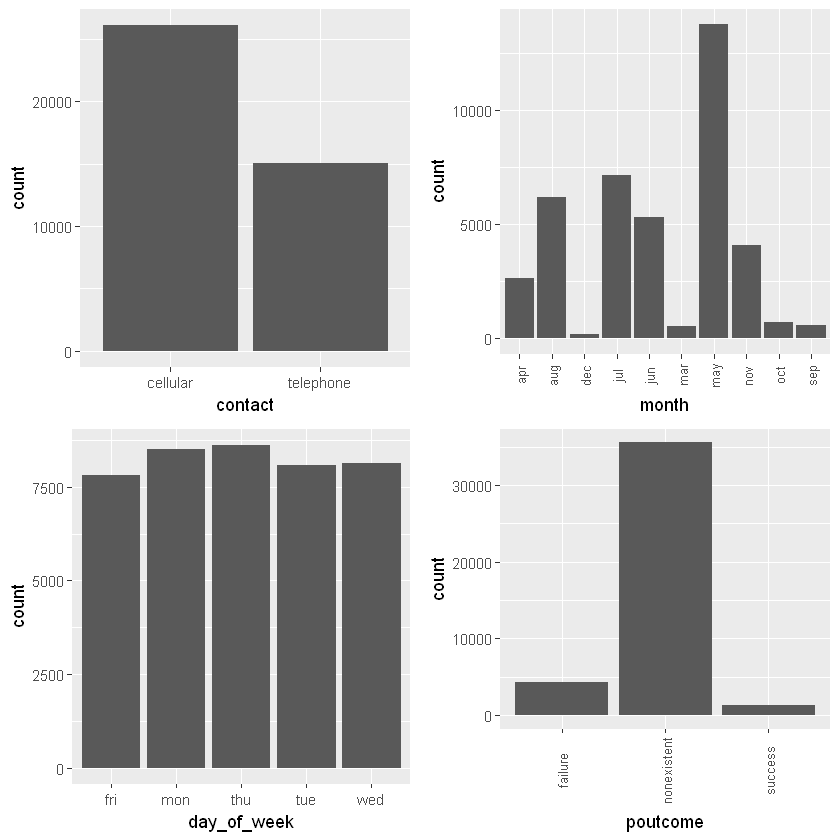

In [9]:
p7 <- ggplot(x, aes(x = contact)) + geom_bar()
p8 <- ggplot(x, aes(x = month)) + geom_bar()+ theme(axis.text.x = element_text(angle = 90, vjust = 0.5, size = 8))
p9 <- ggplot(x, aes(x = day_of_week)) + geom_bar()
p10 <- ggplot(x, aes(x = poutcome)) + geom_bar()+ theme(axis.text.x = element_text(angle = 90, vjust = 0.5, size = 8))

grid.arrange(p7, p8, p9, p10, ncol=2)

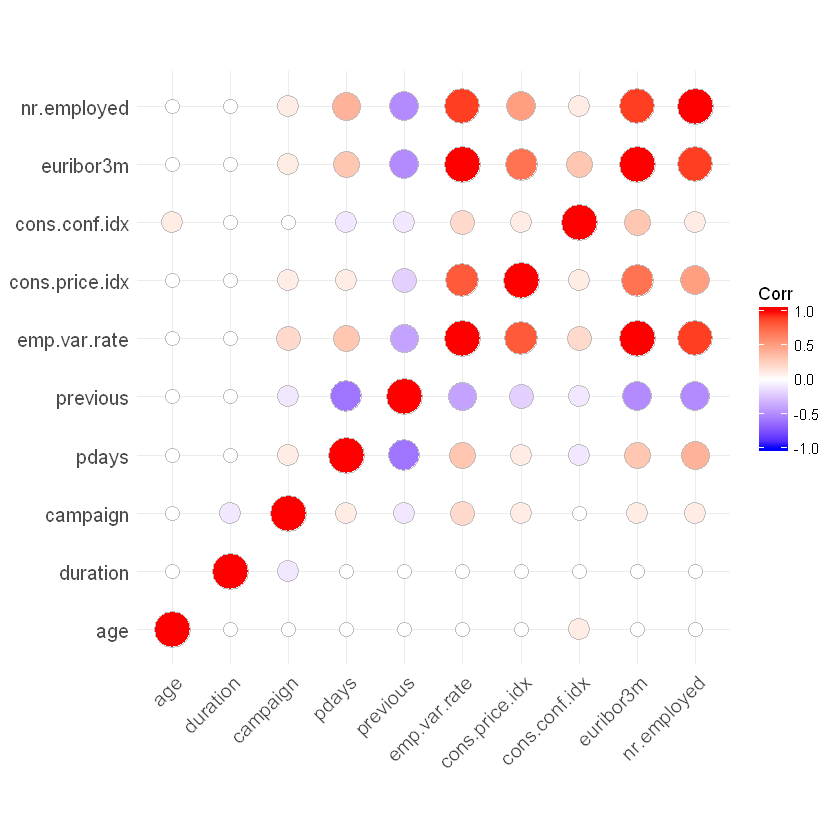

In [10]:
## Se grafica la matriz de correlaciones
data_corr<-select(x, -c(job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome))
corr <- round(cor(data_corr), 1)
ggcorrplot(corr, method = "circle")



De la gráfica anterior se puede ver que existe una correlación positiva entre las variables nr.employed(# de empleados) y euribor3m (tipo europeo de oferta interbancaria), de igual forma estas dos variables tienen correlación positiva con la variable emp.var.rate (tasa de variación del empleo), se puede observar tambien una correlación positiva entre cons.price.idx con las 3 variables mencionadas anteriormente. Estas correlaciones pueden deberse a que las variables son macroeconomicas y todas reflejan el comportamiento de la economía europea.

In [11]:
###Debido a que existe una alta correlación entre las variables nr.employed, euribor3m, emp.var.rate y cons.price.idx
###se decide suprimir estas variables excepto cons.price.idx

## se eliminan las variables nr.employed, euribor3m, emp.var.rate

x = bank[,1:20]
x = x[,-c(16,19,20)]
head(x)
dim(x)

age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4
57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4
37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4
56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4
45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,93.994,-36.4


[1] 41188    17

REMUESTREO DE LOS DATOS
--

In [12]:
### se debe realizar un remuestreo de los datos pues las clases de predicción están desbalanceadas
### se realizará un remuestreo combinado donde los datos de la categoría minoritaría serán replicados y los de la catedoría mayoritaria serán reducidos con el fin de equilibrar los datos
###Primero se separan los datos de cada categoría (si y no)
xsi=subset(bank, bank$y=="yes")
dim(xsi)
xno=subset(bank,bank$y=="no")
dim(xno)

[1] 4640   21

[1] 36548    21

In [17]:
###luego se deben replicar los datos de la categoría si, pues son los que menos observaciones tienen
replicasi=rbind(xsi,xsi)
###se reducen los datos de la categoría no
n=length(xno[,1]);n
i=1:n
ii=sample(i,size=15000, replace=FALSE)
replicano=xno[ii,]


[1] 36548

In [20]:
#### unimos los datos replicados con los datos de la categoría no
replicabank=rbind(replicasi,replicano)
#### se reordenan los datos
replicabank=sample(replicabank)
dim(replicabank)

[1] 24280    21

In [21]:
###se verifica el balanceo de la muestra
y=replicabank$y
prop.table(table(y))

y
       no       yes 
0.6177924 0.3822076 

In [22]:
###Se separa la variable respuesta del set de datos replicado
x = replicabank[,1:20]
head(x)

,nr.employed,loan,month,contact,duration,education,pdays,day_of_week,housing,cons.price.idx,campaign,cons.conf.idx,emp.var.rate,poutcome,default,marital,previous,job,age,euribor3m
76,5191,no,may,telephone,1575,basic.4y,999,mon,yes,93.994,1,-36.4,1.1,nonexistent,unknown,divorced,0,blue-collar,41,4.857
84,5191,no,may,telephone,1042,university.degree,999,mon,yes,93.994,1,-36.4,1.1,nonexistent,unknown,married,0,entrepreneur,49,4.857
89,5191,no,may,telephone,1467,basic.9y,999,mon,no,93.994,1,-36.4,1.1,nonexistent,no,married,0,technician,49,4.857
130,5191,no,may,telephone,579,professional.course,999,mon,yes,93.994,1,-36.4,1.1,nonexistent,unknown,married,0,technician,41,4.857
140,5191,no,may,telephone,461,basic.9y,999,mon,yes,93.994,1,-36.4,1.1,nonexistent,unknown,married,0,blue-collar,45,4.857
183,5191,yes,may,telephone,673,basic.9y,999,mon,yes,93.994,2,-36.4,1.1,nonexistent,no,married,0,blue-collar,42,4.857


In [23]:
##se genera una muestra aleatoria donde se usan (75%) datos para el training y (25%) para el testing
muestra <- sample(1:nrow(x), 11457) 
str(muestra)

### se dividen los datos en conjunto de entrenamiento y conjunto de prueba

xtrain <- x[-muestra,]
xtest <- x[muestra,]
ytrain <- y[-muestra]
ytest <- y[muestra]


 int [1:11457] 4764 21964 13121 9776 19275 10331 14531 2765 748 12360 ...


NOTA
--
Tras evaluar los modelos con esta nueva muestra de datos se decide utilizar los datos sin remuestreo, pues al realizar este proceso se incurre en una sobre estimación del modelo.

In [24]:
### SE GENERAN NUEVAMENTE LOS DATOS DE TRAINING Y TESTING PARTIENDO DE LA BASE ORIGINAL
### se extrae la última columna que contiene la variable de respuesta
y = bank$y

## se elimina la última columna (variable respuesta)

x = bank[,1:20]
x = x[,-c(16,19,20)]
head(x)
dim(x)

age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4
57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4
37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4
56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4
45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,93.994,-36.4


[1] 41188    17

In [25]:
##se genera una muestra aleatoria donde se usan (75%) datos para el training y (25%) para el testing
muestra <- sample(1:nrow(x), 10297) 
str(muestra)

 int [1:10297] 14040 5406 28559 1918 18007 22544 32441 19373 11437 27140 ...


In [26]:
### se dividen los datos en conjunto de entrenamiento y conjunto de prueba

xtrain <- x[-muestra,]
xtest <- x[muestra,]
ytrain <- y[-muestra]
ytest <- y[muestra]
dim(xtrain)

[1] 30891    17

APLICACIÓN DE LA METODOLOGÍA 1: C50
--

In [27]:
## se entrena el modelo, con un adaptative boosting, es decir, 
##se entrenan 50 árboles simultaneamente para aportar más precisión al modelo
c50 <- C5.0(xtrain, ytrain)
c50


Call:
C5.0.default(x = xtrain, y = ytrain)

Classification Tree
Number of samples: 30891 
Number of predictors: 17 

Tree size: 318 

Non-standard options: attempt to group attributes


In [28]:
summary(c50)


Call:
C5.0.default(x = xtrain, y = ytrain)


C5.0 [Release 2.07 GPL Edition]  	Thu Apr 12 18:04:52 2018
-------------------------------

Class specified by attribute `outcome'

Read 30891 cases (18 attributes) from undefined.data

Decision tree:

poutcome = success:
:...duration <= 161:
:   :...cons.conf.idx <= -41.8: no (73/3)
:   :   cons.conf.idx > -41.8:
:   :   :...contact = telephone: no (12/1)
:   :       contact = cellular:
:   :       :...month in {apr,jul,oct}: no (31/9)
:   :           month in {mar,sep}: yes (31/12)
:   :           month = dec:
:   :           :...housing = no: yes (4/1)
:   :           :   housing in {unknown,yes}: no (3)
:   :           month = may:
:   :           :...job in {admin.,blue-collar,entrepreneur,housemaid,
:   :           :   :       management,self-employed,services,student,
:   :           :   :       technician,unemployed,unknown}: no (3)
:   :           :   job = retired: yes (1)
:   :           month = aug:
:   :           :...marital i

In [29]:
### se evalua el modelo con los datos de testing
ytestpred <- predict(c50, xtest)
CrossTable(ytest,ytestpred)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  10297 

 
             | ytestpred 
       ytest |        no |       yes | Row Total | 
-------------|-----------|-----------|-----------|
          no |      8759 |       385 |      9144 | 
             |    25.543 |   250.732 |           | 
             |     0.958 |     0.042 |     0.888 | 
             |     0.937 |     0.404 |           | 
             |     0.851 |     0.037 |           | 
-------------|-----------|-----------|-----------|
         yes |       586 |       567 |      1153 | 
             |   202.569 |  1988.455 |           | 
             |     0.508 |     0.492 |     0.112 | 
             |     0.063 |     0.596 |           | 
             |     0.057 |     0.055 |           | 
-------------|-----------|-----------|---

APLICACIÓN DE LA METODOLOGÍA 2: NAIVE BAYES
--

In [30]:
## se entrena el modelo

bayes <- naiveBayes(xtrain, ytrain)
summary(bayes)

        Length Class  Mode     
apriori  2     table  numeric  
tables  17     -none- list     
levels   2     -none- character
call     3     -none- call     

In [31]:
## se pronostica con los datos de testing
ytestpred1 <- predict(bayes, xtest)
#head(ytestpred1)

In [32]:
## se calcula la matriz de confusión
table(ytest, ytestpred1)

     ytestpred1
ytest   no  yes
  no  8615  529
  yes  646  507

APLICACIÓN DE LA METODOLOGÍA 3: OneR
--

In [33]:
## se entrena el modelo

or <- OneR(ytrain ~ ., data = xtrain, verbose = TRUE)
or

Warning message in OneR.data.frame(x = data, ties.method = ties.method, verbose = verbose, :
"data contains unused factor levels"


    Attribute      Accuracy
1 * pdays          89.77%  
2   poutcome       89.76%  
3   duration       89.18%  
4   previous       88.87%  
5   month          88.75%  
6   age            88.71%  
6   job            88.71%  
6   marital        88.71%  
6   education      88.71%  
6   default        88.71%  
6   housing        88.71%  
6   loan           88.71%  
6   contact        88.71%  
6   day_of_week    88.71%  
6   campaign       88.71%  
6   cons.price.idx 88.71%  
6   cons.conf.idx  88.71%  
---
Chosen attribute due to accuracy
and ties method (if applicable): '*'




Call:
OneR.formula(formula = ytrain ~ ., data = xtrain, verbose = TRUE)

Rules:
If pdays = (-0.999,200] then ytrain = yes
If pdays = (799,1e+03]  then ytrain = no

Accuracy:
27732 of 30891 instances classified correctly (89.77%)


In [34]:
summary(or)


Call:
OneR.formula(formula = ytrain ~ ., data = xtrain, verbose = TRUE)

Rules:
If pdays = (-0.999,200] then ytrain = yes
If pdays = (799,1e+03]  then ytrain = no

Accuracy:
27732 of 30891 instances classified correctly (89.77%)

Contingency table:
      pdays
ytrain (-0.999,200] (799,1e+03]   Sum
   no           414     * 26990 27404
   yes        * 742        2745  3487
   Sum         1156       29735 30891
---
Maximum in each column: '*'

Pearson's Chi-squared test:
X-squared = 3350.4, df = 1, p-value < 2.2e-16



In [35]:
## se pronostica con los datos de pronostico
ytestpred2 <- predict(or, xtest)

In [36]:
### se obtiene la matriz de confusión
table(ytest, ytestpred2)

     ytestpred2
ytest   no  yes
  no  9010  134
  yes  928  225

APLICACIÓN DE LA METODOLOGÍA 4: RANDOM FOREST
--

In [37]:
### se entrena el modelo
set.seed(500)
rf <- randomForest(ytrain ~ ., data = xtrain)
rf


Call:
 randomForest(formula = ytrain ~ ., data = xtrain) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 8.64%
Confusion matrix:
       no  yes class.error
no  26364 1040  0.03795066
yes  1630 1857  0.46745053

In [38]:
## se obtiene el pronostico con los datos de testing
ytestpred4 <- predict(rf, xtest)

In [39]:
### se obtiene la matriz de confusión
table(ytest, ytestpred4)

     ytestpred4
ytest   no  yes
  no  8788  356
  yes  565  588

COMPARACIÓN DE LOS MODELOS
--
Para la comparación de los modelos se utilizarán las métricas:
1. Accuracy
2. Sensibilidad
3. Especificidad
4. Classification Error

In [40]:
#### SE CALCULA ACCURACY PARA LOS MODELOS
###C50
ac1 <-accuracy(ytest,ytestpred)

###Naive Bayes
ac2 <- accuracy(ytest,ytestpred1)

###OneR
ac3<-accuracy(ytest,ytestpred2)

###Random Forest
ac4<-accuracy(ytest,ytestpred4)

accuracy<-c(ac1,ac2,ac3,ac4)
modelo<-c("C50","NB","OR","RF")
df<-data.frame(modelo,accuracy)
df

modelo,accuracy
C50,0.9057007
NB,0.8858891
OR,0.8968632
RF,0.9105565


De acuerdo a la medida de accuracy obtenida para cada modelo se puede decir que el modelo que mejor predice es random forest con 0,91 en esta medida, sin embargo todos los modelos tienen una buena medida excepto Naive Bayes, pues es el unico por debajo del pronóstico ingenuo (0,887).

In [41]:
###SE CALCULA LA SENSIBILIDAD PARA LOS MODELOS
###C50
sen1 <-sensitivity(ytestpred,ytest,positive = "yes")

###Naive Bayes
sen2 <- sensitivity(ytestpred1,ytest,positive = "yes")

###OneR
sen3<-sensitivity(ytestpred2,ytest,positive = "yes")

###Random Forest
sen4<-sensitivity(ytestpred4,ytest,positive = "yes")

sen<-c(sen1,sen2,sen3,sen4)
modelo<-c("C50","NB","OR","RF")
df<-data.frame(modelo,sen)
df

modelo,sen
C50,0.4917606
NB,0.4397225
OR,0.1951431
RF,0.5099740


La senesibilidad o tasa verdadera positiva que mide la proporción de casos positivos que fueron correctamente clasificados es más alta en el modelo realizado con la metodología OneR.

In [42]:
###SE CALCULA LA ESPECIFICIDAD PARA LOS MODELOS
###C50
spe1 <-specificity(ytestpred,ytest,negative = "no")

###Naive Bayes
spe2 <- specificity(ytestpred1,ytest,negative = "no")

###OneR
spe3<-specificity(ytestpred2,ytest,negative = "no")

###Random Forest
spe4<-specificity(ytestpred4,ytest,negative = "no")

spe<-c(spe1,spe2,spe3,spe4)
modelo<-c("C50","NB","OR","RF")
df<-data.frame(modelo,spe)
df

modelo,spe
C50,0.9578959
NB,0.9421479
OR,0.9853456
RF,0.9610674


Para el caso de la especificidad que mide los falsos positivos, esta aumenta a medida que la sensibilidad disminuye, por lo tanto se puede asumir que nuevamente el modelo realizado con la metodología OneR es el que mejor resultado tiene y el realizado con Naive Bayes es que el que peor resultado registra. EL segundo modelo con mejor resultado es Random Forest.

In [43]:
#### SE CALCULA EL ERROR DE LASIFICACIÓN PARA LOS MODELOS
###C50
ce1 <-ce(ytest,ytestpred)

###Naive Bayes
ce2 <- ce(ytest,ytestpred1)

###OneR
ce3<-ce(ytest,ytestpred2)

###Random Forest
ce4<-ce(ytest,ytestpred4)

ce<-c(ce1,ce2,ce3,ce4)
modelo<-c("C50","NB","OR","RF")
df<-data.frame(modelo,ce)
df

modelo,ce
C50,0.09429931
NB,0.11411091
OR,0.10313684
RF,0.08944353


El error de clasificaición mide la proporción de elementos que no corresponden al mismo valor en la predicción del modelo, por lo tanto entre menor sea esta medida mejor será el modelo, por lo tanto el modelo Random Forest tiene una mejor predicción.

CONCLUSIÓN
--

De acuerdo a las medidas anteriores se puede concluir que el mejor modelo es el realizado con la metodología de Random Forest por obtener los mejores resultados en Accuracy y el error de clasificación y por tener el segundo mejor puntaje en especificidad. 

Se concluye entonces que con este modelo se puede predecir cuales clientes van a adquirir un deposito a termino con una precisión del 91%.